### 0. Imports:

In [1]:
import numpy as np
import glob
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential

In [2]:
!unzip data.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: data/paper/paper484.jpg  
  inflating: __MACOSX/data/paper/._paper484.jpg  
  inflating: data/paper/paper71.jpg  
  inflating: __MACOSX/data/paper/._paper71.jpg  
  inflating: data/paper/paper65.jpg  
  inflating: __MACOSX/data/paper/._paper65.jpg  
  inflating: data/paper/paper490.jpg  
  inflating: __MACOSX/data/paper/._paper490.jpg  
  inflating: data/paper/paper269.jpg  
  inflating: __MACOSX/data/paper/._paper269.jpg  
  inflating: data/paper/paper255.jpg  
  inflating: __MACOSX/data/paper/._paper255.jpg  
  inflating: data/paper/paper533.jpg  
  inflating: __MACOSX/data/paper/._paper533.jpg  
  inflating: data/paper/paper527.jpg  
  inflating: __MACOSX/data/paper/._paper527.jpg  
  inflating: data/paper/paper241.jpg  
  inflating: __MACOSX/data/paper/._paper241.jpg  
  inflating: data/paper/paper296.jpg  
  inflating: __MACOSX/data/paper/._paper296.jpg  
  inflating: data/paper/paper282.jpg  
  inflatin

### 1. Data analysis:

In [3]:
data_dir = os.path.join("data")

labels = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

for label in labels:
    directory = os.path.join(data_dir, label)
    print(f"Images of label \"{label}\":\t{len(os.listdir(directory))}")

Images of label "cardboard":	403
Images of label "glass":	501
Images of label "metal":	410
Images of label "paper":	594
Images of label "plastic":	482
Images of label "trash":	137


In [4]:
for i in range(6):
    directory = os.path.join(data_dir, labels[i])
    for j in range(20):
        path = os.path.join(directory, os.listdir(directory)[j])
        image = mpimg.imread(path)
        print(image.shape)

(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 

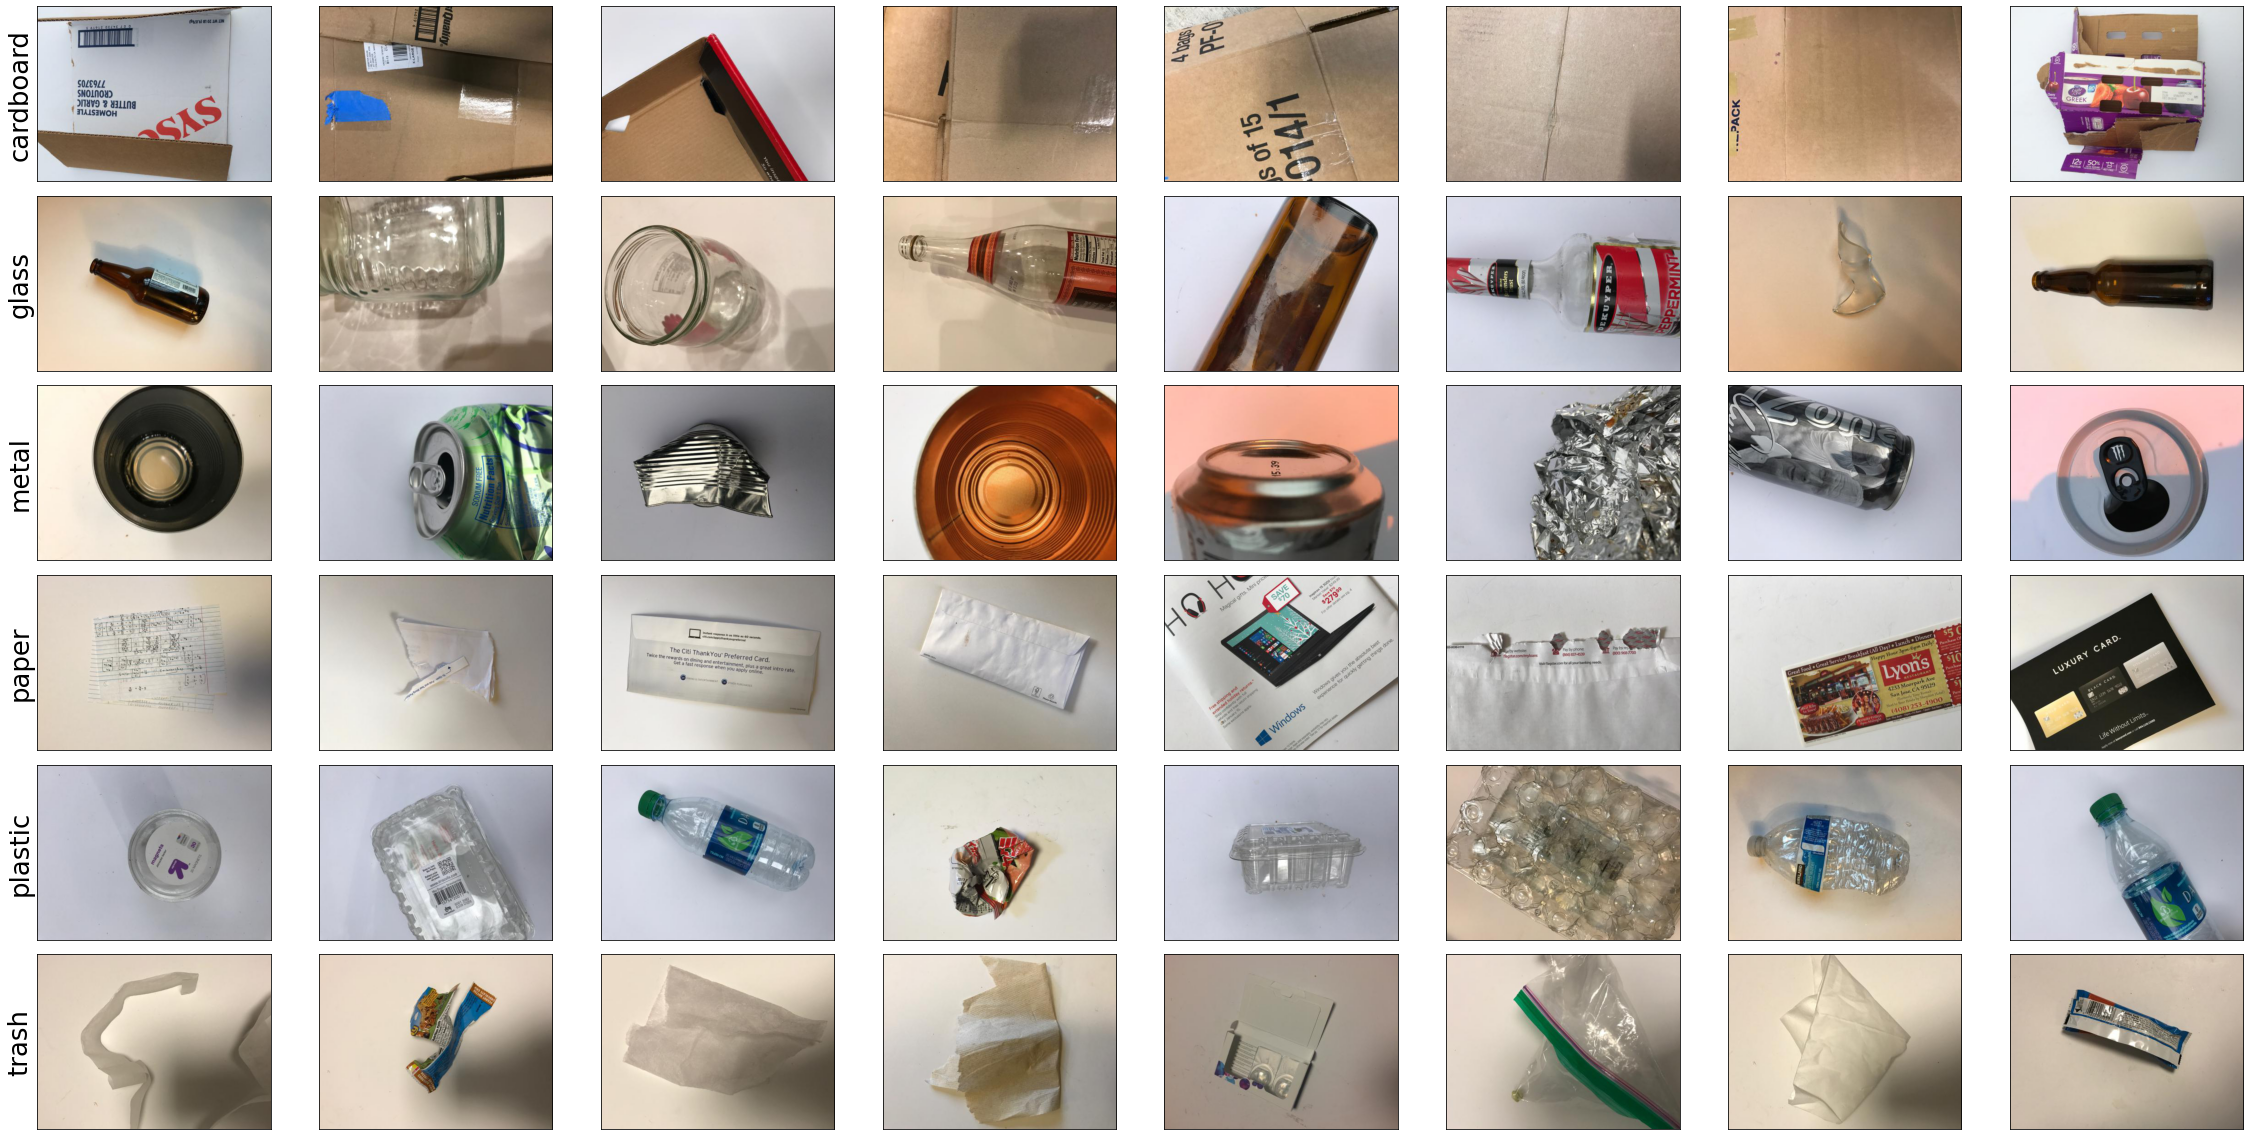

In [5]:
plt.figure(figsize=(32,16))

for i in range(6):
    directory = os.path.join(data_dir, labels[i])
    for j in range(8):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 8, i*8 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=26)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

### 2. Deep learning:

Variables:

In [6]:
batch_size = 30
img_height = 384
img_width = 512
seed = 42

Train / validation / test:

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = train_datagen.flow_from_directory(data_dir, target_size=(img_height, img_width),
                                                    batch_size=batch_size, classes=labels, 
                                                    class_mode="categorical", subset="training",
                                                    seed=seed)

validation_generator = test_datagen.flow_from_directory(data_dir, target_size=(img_height, img_width),
                                                        batch_size=batch_size, classes=labels,
                                                        class_mode="categorical", subset="validation",
                                                        seed=seed)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 384, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 192, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 128, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 128, 32)       18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 64, 32)       0

In [10]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["acc"])

In [11]:
history = model.fit_generator(train_generator, validation_data=validation_generator, epochs=30, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
76/76 [==============================] - 40s 362ms/step - loss: 1.5498 - acc: 0.3427 - val_loss: 1.5080 - val_acc: 0.3267
Epoch 2/30
76/76 [==============================] - 25s 326ms/step - loss: 1.2672 - acc: 0.5000 - val_loss: 1.3164 - val_acc: 0.4980
Epoch 3/30
76/76 [==============================] - 25s 325ms/step - loss: 1.0906 - acc: 0.5861 - val_loss: 1.2243 - val_acc: 0.5060
Epoch 4/30
76/76 [==============================] - 25s 326ms/step - loss: 0.9159 - acc: 0.6573 - val_loss: 1.2163 - val_acc: 0.5817
Epoch 5/30
76/76 [==============================] - 25s 326ms/step - loss: 0.7195 - acc: 0.7333 - val_loss: 1.5477 - val_acc: 0.5139
Epoch 6/30
76/76 [==============================] - 25s 326ms/step - loss: 0.5082 - acc: 0.8286 - val_loss: 1.5527 - val_acc: 0.5339
Epoch 7/30
76/76 [==============================] - 25s 326ms/step - loss: 0.3816 - acc: 0.8717 - val_loss: 1.5314 - val_acc: 0.5737
Epoch 8/30
76/76 [==============================] - 25s 325ms/step - 